Epoch 1/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.8570 - mae: 0.6135 - val_loss: 0.4469 - val_mae: 0.4728
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.4042 - mae: 0.4519 - val_loss: 0.3859 - val_mae: 0.4372
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.3765 - mae: 0.4316 - val_loss: 0.3639 - val_mae: 0.4256
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.3545 - mae: 0.4181 - val_loss: 0.3602 - val_mae: 0.4333
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.3438 - mae: 0.4070 - val_loss: 0.3560 - val_mae: 0.4198
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.3290 - mae: 0.3972 - val_loss: 0.3262 - val_mae: 0.3991
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.3123 - mae: 0.3882 - val_loss: 0.3124 - val_mae: 0.3936
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3120 - mae: 0.3864 - val_loss: 0.3869 - val_mae: 0.3972
Epoch 9/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - lo

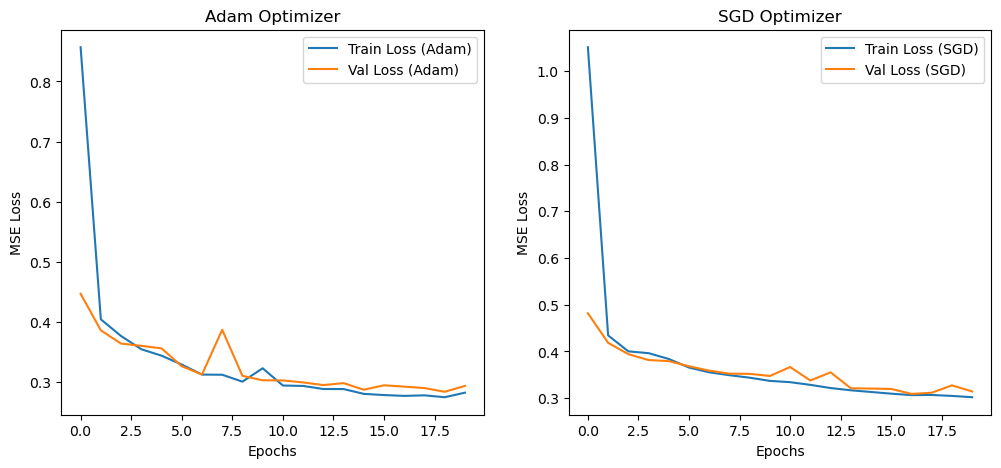

In [2]:
# California Housing Regression with Neural Network
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load dataset
# -----------------------------
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling (important for neural nets)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# -----------------------------
# 2. Build model function
# -----------------------------
def build_model(activation="relu", optimizer="adam"):
    model = keras.Sequential([
        keras.Input(shape=(X_train.shape[1],)),   # fixed input shape
        keras.layers.Dense(64, activation=activation),
        keras.layers.Dense(64, activation=activation),
        keras.layers.Dense(1, activation="linear")   # regression output
    ])
    model.compile(
        optimizer=optimizer,
        loss="mse",       # Mean Squared Error
        metrics=["mae"]   # Mean Absolute Error
    )
    return model

# -----------------------------
# 3. Train with Adam optimizer
# -----------------------------
model_adam = build_model(activation="relu", optimizer="adam")
history_adam = model_adam.fit(
    X_train, y_train, 
    epochs=20, 
    validation_data=(X_val, y_val), 
    verbose=1
)

# -----------------------------
# 4. Train with SGD optimizer
# -----------------------------
model_sgd = build_model(activation="relu", optimizer="sgd")
history_sgd = model_sgd.fit(
    X_train, y_train, 
    epochs=20, 
    validation_data=(X_val, y_val), 
    verbose=1
)

# -----------------------------
# 5. Evaluate both models
# -----------------------------
mse_adam, mae_adam = model_adam.evaluate(X_val, y_val, verbose=0)
mse_sgd, mae_sgd = model_sgd.evaluate(X_val, y_val, verbose=0)

print("Adam Optimizer - MSE:", mse_adam, "MAE:", mae_adam)
print("SGD Optimizer  - MSE:", mse_sgd, "MAE:", mae_sgd)

# -----------------------------
# 6. Plot learning curves
# -----------------------------
plt.figure(figsize=(12,5))

# Adam loss
plt.subplot(1,2,1)
plt.plot(history_adam.history["loss"], label="Train Loss (Adam)")
plt.plot(history_adam.history["val_loss"], label="Val Loss (Adam)")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Adam Optimizer")
plt.legend()

# SGD loss
plt.subplot(1,2,2)
plt.plot(history_sgd.history["loss"], label="Train Loss (SGD)")
plt.plot(history_sgd.history["val_loss"], label="Val Loss (SGD)")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("SGD Optimizer")
plt.legend()

plt.show()


### Adam Optimizer

#### Final MSE ≈ 0.293, MAE ≈ 0.369 (~$36.9K error).

### Converged faster, achieved lower error.

### SGD Optimizer 

### Final MSE ≈ 0.314, MAE ≈ 0.398 (~$39.8K error).

### Slower convergence, slightly worse accuracy.

🔹 Insights

Adam > SGD here → adaptive learning rates help more.

Both models generalize similarly, but Adam gives a smaller average prediction error.

MAE (~$37K–$40K) means the model’s predictions are typically off by that much in house price (target in $100k units).

 Interpretation: Adam is the better default optimizer for this regression task.